In [1]:
from google.colab import drive  ## Mount Drive
drive.mount('/content/drive')

Mounted at /content/drive


All 10 labels are equally divided so label balancing would not be an issue and we can still take accuracy to be the metrix to define the success of our classifier.


As I got a 100% accuracy score on my current model I did not experiment further but these are the approaches I would like to also try if I had more time

1. Use stacking BERT + RoberTa + Word2Vec + Glove embeddings to feed to ML models like SVM, XGBOOST, Randomforest for a better Meta-Classifier


These are the normal approaches but I chose not to go with them:
TF-IDF - because it wont work well on unseen data for a larger test set this approach is not valid. Does not understand contextual meaning of data
Word2vec - Wont work for unseen words


Current Approach 

1. Step one 
Label visualization - All labels are almost equal in number so no sampling is required.

Step 2
Cleaning data. Used nltk to remove stop words and other punctuations / symbols from data. Converted all data to lower case.

Step 3
Tokenize
Tokenized data using bert base uncased.
(Also experimented with Distilbert but due to small dataset we can afford to use BERT)
This was encoded in proper format to be fed to the Huggingface trainer API with a BERT classification head

The model was trained for 2 epochs and we got perfect results
(100% accuracy)



In [1]:
import os
os.chdir('/content/drive/MyDrive/task')

In [2]:
import pandas as pd

In [3]:
ls

ds_task_dataset.csv  logs/  results/


In [75]:
train = pd.read_csv('ds_task_dataset.csv')

In [76]:
train.head()

,text,label
0,Why did I only receive a partial amount of wha...,3
1,my atm transaction was wrong,3
2,why did i only get 20.00,3
3,Why is my cash request and the amount I receiv...,3
4,"I tried to withdraw $100, all it gave me was $20.",3


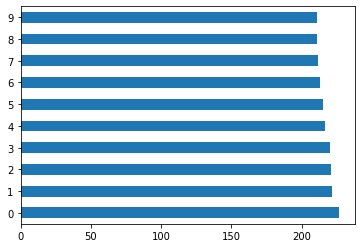

In [77]:
train['label'].value_counts().plot(kind = 'barh')

In [78]:
train['label'].value_counts()

0    227
1    222
2    221
3    220
4    217
5    215
6    213
7    212
8    211
9    211
Name: label, dtype: int64

In [79]:
train.text.str.len().min()

15

In [80]:
train.text.str.len().max()

409

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2169 non-null   object
 1   label   2169 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.0+ KB


All 9 labels are equally divided so label balancing would not be an issue and we can still take accuracy to be the metrix to define the success of our classifier.


After doing some preliminary analysis I can think of 3 approaches

1. Tf-IDF + Classification - Altho

In [17]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 32.8 MB/s 
     |████████████████████████████████| 67 kB 6.9 MB/s 
     |████████████████████████████████| 596 kB 52.1 MB/s 
     |████████████████████████████████| 895 kB 62.7 MB/s 
     |████████████████████████████████| 6.5 MB 57.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
import nltk
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:
stop_words = stopwords.words("english")

In [84]:

def text_clean(x):


    x = x.lower() # lowercase everything
    x = x.encode('ascii', 'ignore').decode()  # remove unicode characters
    x = re.sub(r'https*\S+', ' ', x) # remove links
    x = re.sub(r'http*\S+', ' ', x)
    # cleaning up text
    x = re.sub(r'\'\w+', '', x) 
    x = re.sub(r'\w*\d+\w*', '', x)
    x = re.sub(r'\s{2,}', ' ', x)
    x = re.sub(r'\s[^\w\s]\s', '', x)
    


    return x

In [85]:
train['cleaned_text'] = train.text.apply(text_clean)

In [86]:
train['cleaned_text']

0       why did i only receive a partial amount of wha...
1                            my atm transaction was wrong
2                                    why did i only get .
3       why is my cash request and the amount i receiv...
4            i tried to withdraw $, all it gave me was $.
                              ...                        
2164    was charged an atm fee despite it being a smal...
2165               i had a wrong fee charged at this atm.
2166    when i got cash, i pretty sure there was a gli...
2167    my account got charged for taking out cash, wh...
2168                  why is there a fee for withdrawing?
Name: cleaned_text, Length: 2169, dtype: object

In [87]:
train.head()

,text,label,cleaned_text
0,Why did I only receive a partial amount of wha...,3,why did i only receive a partial amount of wha...
1,my atm transaction was wrong,3,my atm transaction was wrong
2,why did i only get 20.00,3,why did i only get .
3,Why is my cash request and the amount I receiv...,3,why is my cash request and the amount i receiv...
4,"I tried to withdraw $100, all it gave me was $20.",3,"i tried to withdraw $, all it gave me was $."


In [88]:
train.drop(['text'],inplace=True,axis=1)

In [89]:
train.head()

,label,cleaned_text
0,3,why did i only receive a partial amount of wha...
1,3,my atm transaction was wrong
2,3,why did i only get .
3,3,why is my cash request and the amount i receiv...
4,3,"i tried to withdraw $, all it gave me was $."


In [90]:
train.tail()

,label,cleaned_text
2164,4,was charged an atm fee despite it being a smal...
2165,4,i had a wrong fee charged at this atm.
2166,4,"when i got cash, i pretty sure there was a gli..."
2167,4,"my account got charged for taking out cash, wh..."
2168,4,why is there a fee for withdrawing?


In [91]:
from sklearn.utils import shuffle
train = shuffle(train)

In [92]:
train.head()

,label,cleaned_text
2001,6,why was i declined getting cash?
1537,9,my account balance has not updated to reflect ...
2049,7,"when i made a transfer, there was a fee. why?"
1120,5,there are two of the same charges on my account.
2097,9,i didn get the money i transferred


In [93]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.17.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/resolve/ma

In [94]:
X=list(train['cleaned_text'])
y=list(train['label'])

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [96]:
from transformers import DistilBertTokenizerFast,BertTokenizer
#tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json from cache at /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7

In [97]:
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

In [98]:
import torch

class Reuters(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = Reuters(train_encodings, y_train)
#val_dataset = FarmerDataset(val_encodings, val_labels)
test_dataset = Reuters(test_encodings, y_test)

In [99]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

def compute_metrics(p):
  pred, labels = p
  pred = np.argmax(pred, axis=1)
  return pred
  #accuracy = accuracy_score(y_true=labels, y_pred=pred)
  #recall = recall_score(y_true=labels, y_pred=pred)
  #precision = precision_score(y_true=labels, y_pred=pred)
  #f1 = f1_score(y_true=labels, y_pred=pred)
  #return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [100]:
from transformers import TrainingArguments, Trainer,BertForSequenceClassification

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
)

#model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased",num_labels = 10)

model = BertForSequenceClassification.from_pretrained("bert-base-uncased",num_labels = 10)

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,            # training dataset
    #compute_metrics=compute_metrics,
    eval_dataset=test_dataset             # evaluation dataset
)

trainer.train()


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",

Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=218, training_loss=1.406974582497133, metrics={'train_runtime': 56.3764, 'train_samples_per_second': 61.551, 'train_steps_per_second': 3.867, 'total_flos': 156932349309120.0, 'train_loss': 1.406974582497133, 'epoch': 2.0})

In [108]:
from sklearn.metrics import accuracy_score,recall_score,f1_score

In [109]:
predictions = trainer.predict(test_dataset)[1]

***** Running Prediction *****
  Num examples = 434
  Batch size = 16


In [110]:
len(predictions)

434

In [111]:
len(y_test)

434

In [112]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [113]:
print(f1_score(y_test, predictions, average="macro"))

1.0


In [107]:
print(accuracy_score(y_test, predictions))

1.0


In [115]:
confusion_matrix(y_test,predictions)

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 42,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 50]])